# 画像処理　課題3

In [2]:
import cv2, os, sys
import matplotlib.pyplot as plt
import numpy as np
from glob import sys

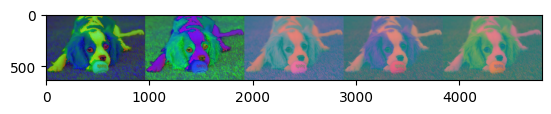

In [3]:
#1 画像を読み込み、HLS、HSV、Lab、YUV、YCrCbに変換し、それぞれの画像を横方向につなげて表示
img_path = "C:\\Users\\makot\\img\\dog.jpg"
img = cv2.imread(img_path)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

img_concat = cv2.hconcat([img_hls, img_hsv, img_lab, img_yuv, img_ycrcb])
plt.imshow(img_concat)

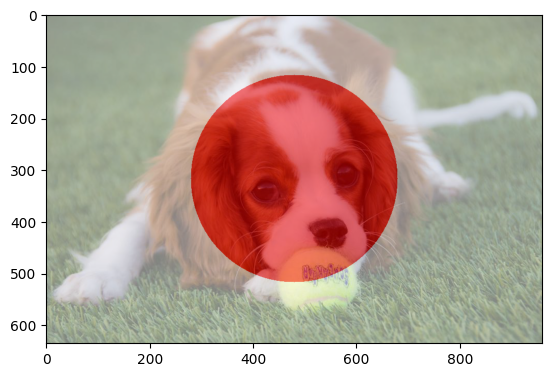

In [6]:
#2 ２枚の画像をブレンド
img1 = cv2.imread("C:\\Users\\makot\\img\\dog.jpg")
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
h,w,c = img1_rgb.shape

img2 = np.zeros((h, w, 3), dtype = np.uint8)
img2[:,:,:] = 255
img2 = cv2.circle(img2, (w//2, h//2), 200, (255,0,0), -1)
img_blend = cv2.addWeighted(img1_rgb, 0.5, img2, 0.5, gamma=0)
plt.imshow(img_blend)

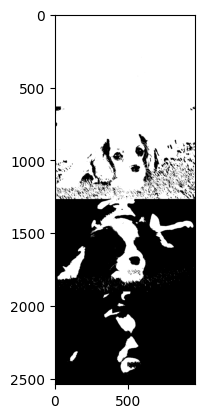

In [7]:
#3 thresholdのthreshパラメータを変え、縦に並べて表示
img = cv2.imread("C:\\Users\\makot\\img\\dog.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_thresh_0 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
ret, img_thresh_50 = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)
ret, img_thresh_128 = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
ret, img_thresh_200 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

h, w, c = img.shape
img_concat = np.zeros((4*h, w), dtype=np.uint8)
img_concat[:h, :] = img_thresh_0
img_concat[h:2*h, :] = img_thresh_50
img_concat[h*2:h*3, :] = img_thresh_128
img_concat[h*3:, :] = img_thresh_200

plt.imshow(img_concat, "gray")

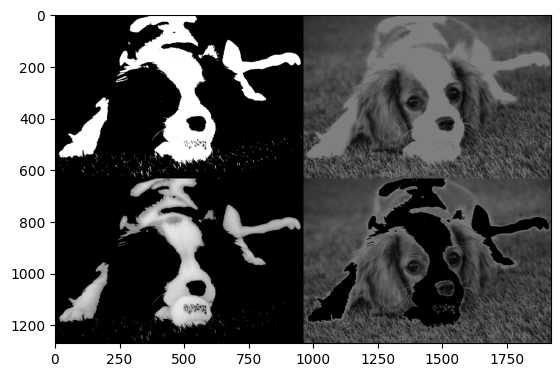

In [8]:
#4 thresholdtypeパラメータを変更し、行列結合のように並べる
img = cv2.imread("C:\\Users\\makot\\img\\dog.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, img_thresh_otsu = cv2.threshold(img_gray, 127, 255, cv2.THRESH_OTSU)
ret, img_thresh_trunc = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, img_thresh_tozero = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, img_thresh_tozero_inv = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

h, w, c = img.shape

img_matrix = np.zeros((h*2, w*2), dtype = np.uint8)
img_matrix[:h, :w] = img_thresh_otsu
img_matrix[:h, w:w*2] = img_thresh_trunc
img_matrix[h:h*2, :w] = img_thresh_tozero
img_matrix[h:h*2, w:w*2] = img_thresh_tozero_inv

plt.imshow(img_matrix, "gray")

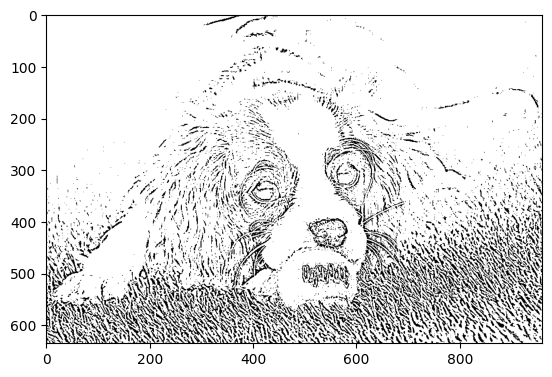

In [9]:
#5 adaptive Thresholdを用いてadaptiveMethodを変更し、表示
img = cv2.imread("C:\\Users\\makot\\img\\dog.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_adaptive_thresh_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 5)
plt.imshow(img_adaptive_thresh_gaussian, "gray")

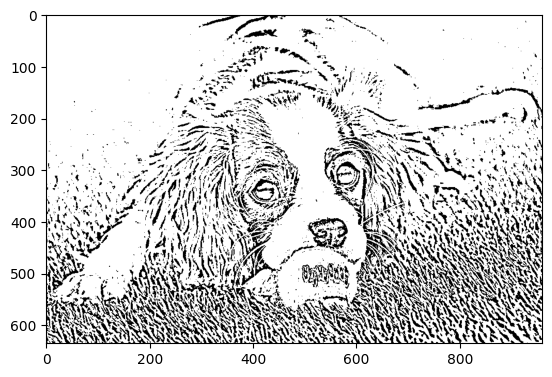

In [10]:
img = cv2.imread("C:\\Users\\makot\\img\\dog.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_adaptive_thresh_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
plt.imshow(img_adaptive_thresh_mean, "gray")

(318, 480, 3)


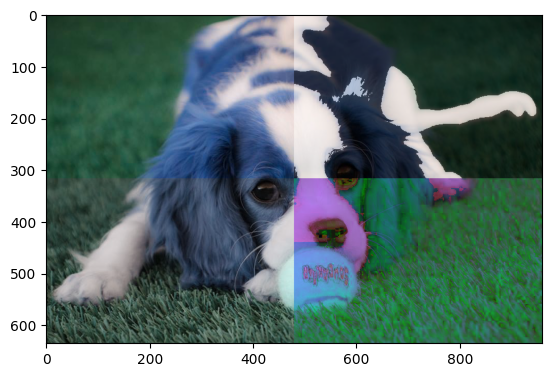

In [12]:
#6 threshold, gray, HSVの画像を⾏列の結合を⽤いて並べ、BGR画像とブレンドして表⽰
img = cv2.imread("C:\\Users\\makot\\img\\dog.jpg")
h,w,c = img.shape
img_gray = cv2.cvtColor(img[h//2:h, :w//2], cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img[:h//2, w//2:w], cv2.COLOR_BGR2GRAY)
ret, img_thresh = cv2.threshold(img_gray2, 127, 255, cv2.THRESH_BINARY)
img_hsv = cv2.cvtColor(img[h//2:h, w//2:w], cv2.COLOR_BGR2HSV)

img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
img_thresh = cv2.cvtColor(img_thresh, cv2.COLOR_GRAY2RGB)

print(img_gray.shape)

img_concat = np.zeros((h,w,c), dtype=np.uint8)
img_concat[:h//2, :w//2] = img[:h//2, :w//2]
img_concat[h//2:h, w//2:w] = img_hsv
img_concat[h//2:h, :w//2] = img_gray
img_concat[:h//2, w//2:w] = img_thresh

img_blend = cv2.addWeighted(img_concat, 0.5, img, 0.5, gamma=0)
plt.imshow(img_blend)